In [41]:
#data set 

a = [0,0,1,1,0,0,
     0,1,0,0,1,0,
     1,1,1,1,1,1,
     1,0,0,0,0,1,
     1,0,0,0,0,1
     ]

b = [0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0]

c = [0,1,1,1,1,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,1,1,1,0
     ]

#building a 3 letter classifier 
#ignoring the bias 



In [42]:
#creating labels , which is a numpy nd array with diagonal values 1 

y = [[1,0,0],
     [0,1,0],
     [0,0,1]]

import numpy as np 
import matplotlib.pyplot as plt 



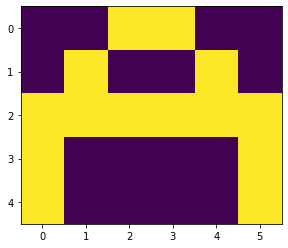

In [43]:
#visualise the data 
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [44]:
#convert data and labels into numpy array 
x = [np.array(a).reshape(1,30), np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y = np.array(y)

print(x,"\n\n", y)
                                                    

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [45]:
#layers --- input (1,30)
# hidden layer will have (1,5)
#output layer (3,3)



In [46]:
#creating an activation function 
#defining the sigmoid function 
def sigmoid(x):
    return(1/(1+np.exp(-x)))

#creating feed  forward propagation (NN)

def f_forward(x,w1,w2):
    #hidden layer (linear algorithm to simplify the modeling of the data)
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    
    #ouput layer 
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)





In [47]:
#initialising the weights 
def generate_wts(x,y):
    l = []
    for i in range (x*y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x,y))



In [48]:
#creating and checking using loss function 

def loss(out, Y ):
    s = (np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)

In [49]:
#back propagation 
def back_prop(x,y,w1,w2,alpha):
    
    #hidden layer 
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    
    #output layer 
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    d2 = (a2 - y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),np.multiply(a1,1-a1))
    
    #gradient 
    
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
    
    w1=w1 - (alpha*(w1_adj))
    w2=w2 - (alpha*(w2_adj))
    
    return(w1,w2)
    

In [29]:
#training the dataset 
#alpha is used to 
def train(x,Y,w1,w2,alpha = 0.01 , epoch = 10):
    acc = []
    loss_list = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1 ,w2)
            l.append((loss(out,Y[i])))
            w1 , w2 = back_prop(x[i],y[i],w1,w2,alpha)
        print("Epochs: " , j+1 , "acc:" , (1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        loss_list.append((sum(l))/len(x))
    return (acc, loss_list , w1, w2)
            

In [57]:
#defining the function to predict the values 
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    k = np.argmax(Out[0])
    
    if k == 0:
        print("Image is of letter A")
    elif k == 1:
        print("Image is of letter B")
    else:
        print("Image is of letter C")
    
    plt.imshow(x.reshape(5, 6))
    plt.show()

In [51]:
w1 = generate_wts(30,5)
w2 = generate_wts(5,3)
print(w1,"\n", w2)



[[-0.2112463   0.72676706  0.30866426  0.07397116 -0.38564311]
 [-1.06297467  0.49546603  1.07671924  0.40886413 -1.70638803]
 [ 0.23273247 -1.66320205 -0.36321518 -0.08321586 -1.31974442]
 [-1.18100874 -0.39961019  0.0399851   0.14210084  2.19409013]
 [-1.10072909 -0.95403718 -2.11634233 -0.3590858  -0.49157601]
 [ 0.28226012  0.68223331 -0.88987243 -0.76636956  0.19747755]
 [-1.57118098 -1.12163495  1.23452336 -0.6049073   1.23070439]
 [-2.04301664 -0.03645477 -1.17588786  1.00097198  0.12956527]
 [-0.23356995  1.02764586 -1.33964597 -1.03454141 -1.79932199]
 [ 0.49790238  1.38466931  0.07779252  0.35224123  0.80650708]
 [ 0.21495706 -0.76613727 -0.72024743 -0.26879604  0.24143421]
 [ 1.00929891  1.01125314  0.724459    0.29786109 -0.69114789]
 [-1.13680161 -1.15394308  1.69045179 -0.85842933  1.58597168]
 [-0.66062942 -0.15411008 -0.86987642  1.20146987  1.26572716]
 [ 0.25162874  0.8684238   1.03173013 -0.04781667  0.65051503]
 [ 1.2984124   0.08280737  0.40507073 -0.01080828 -0.37

In [52]:
#getting the accuracy the loss and the weights after training 
acc, loss_list, w1 , w2 = train(x,y,w1,w2,0.01 ,100)


Epochs:  1 acc: 74.8668803566707
Epochs:  2 acc: 74.98295594674205
Epochs:  3 acc: 75.09677205008678
Epochs:  4 acc: 75.20840247734986
Epochs:  5 acc: 75.31791720880346
Epochs:  6 acc: 75.4253828089333
Epochs:  7 acc: 75.53086279660494
Epochs:  8 acc: 75.63441797341157
Epochs:  9 acc: 75.73610671297385
Epochs:  10 acc: 75.8359852140718
Epochs:  11 acc: 75.93410772054565
Epochs:  12 acc: 76.03052671091102
Epochs:  13 acc: 76.12529306059966
Epochs:  14 acc: 76.21845617966503
Epochs:  15 acc: 76.31006412868841
Epochs:  16 acc: 76.40016371549059
Epochs:  17 acc: 76.48880057510384
Epochs:  18 acc: 76.5760192352911
Epochs:  19 acc: 76.66186316972295
Epochs:  20 acc: 76.74637484073912
Epochs:  21 acc: 76.82959573343675
Epochs:  22 acc: 76.91156638264489
Epochs:  23 acc: 76.99232639416628
Epochs:  24 acc: 77.07191446149763
Epochs:  25 acc: 77.15036837907856
Epochs:  26 acc: 77.22772505296923
Epochs:  27 acc: 77.30402050971868
Epochs:  28 acc: 77.37928990406036
Epochs:  29 acc: 77.4535675259573

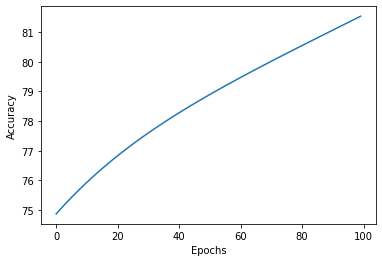

In [53]:
import matplotlib.pyplot as plt1

plt.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

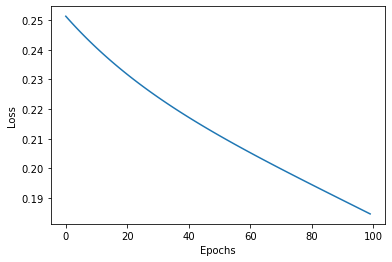

In [54]:
plt.plot(loss_list)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [55]:
print(w1, '\n' , w2)


[[-0.2112463   0.72676706  0.30866426  0.07397116 -0.38564311]
 [-1.10761415  0.44427473  0.996414    0.50870559 -1.65754976]
 [ 0.18750308 -1.7641124  -0.3814704  -0.11232388 -1.28876935]
 [-1.22623813 -0.50052054  0.02172988  0.11299281  2.2250652 ]
 [-1.14536856 -1.00522849 -2.19664758 -0.25924434 -0.44273774]
 [ 0.28226012  0.68223331 -0.88987243 -0.76636956  0.19747755]
 [-1.57118098 -1.12163495  1.23452336 -0.6049073   1.23070439]
 [-2.08824603 -0.13736512 -1.19414308  0.97186395  0.16054034]
 [-0.23356995  1.02764586 -1.33964597 -1.03454141 -1.79932199]
 [ 0.49790238  1.38466931  0.07779252  0.35224123  0.80650708]
 [ 0.16542118 -0.85931973 -0.72074117 -0.4566794   0.26363855]
 [ 1.00929891  1.01125314  0.724459    0.29786109 -0.69114789]
 [-1.13739152 -1.20366213  1.75250181 -0.98737882  1.56810848]
 [-0.7058588  -0.25502043 -0.88813164  1.17236184  1.29670223]
 [ 0.20209286  0.77524134  1.03123639 -0.23570003  0.67271936]
 [ 1.24887652 -0.01037509  0.40457699 -0.19869164 -0.35

Image is of letter C


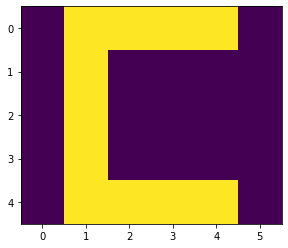

In [60]:
predict(x[2],w1,w2)